<a href="https://colab.research.google.com/github/greensky0107/first_repository/blob/master/MainQuest_3_%EC%B5%9C%EC%88%99%EC%96%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#데이터 처리
import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계툴
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# 통계툴
from scipy import stats
from scipy.stats import shapiro

In [109]:
### **문제 1: 데이터 로드 및 탐색**

# **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
# **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/online_retail.xlsx'  # MyDrive 안에 파일 있음
retail = pd.read_excel(file_path)
retail.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [110]:
# retail에 있는 2009-2010 과  2010-2011 합쳐서 retail data frame으로 만들기
# 시트별로 읽기
df1 = pd.read_excel(file_path, sheet_name='Year 2009-2010')
df2 = pd.read_excel(file_path, sheet_name='Year 2010-2011')

# 위아래로 합치기 (행 추가)
retail = pd.concat([df1, df2], ignore_index=True)

# 결과 확인
print(retail.shape)
retail.head()


(1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [111]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [112]:
retail.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [113]:
### **문제 2: 데이터 전처리**

#`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
#`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
# 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).


# 1. InvoiceDate를 datetime으로 변환
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

# 2. Customer ID 결측치 제거
retail = retail.dropna(subset=['Customer ID'])

# 3. Customer ID를 정수형으로 변환
retail['Customer ID'] = retail['Customer ID'].astype(int)

# 4. InvoiceDate 기준으로 데이터 정렬
retail = retail.sort_values('InvoiceDate').reset_index(drop=True)

# 5. Total 컬럼 생성 (Quantity * Price)
retail['Total'] = retail['Quantity'] * retail['Price']

# 결과 일부 확인
print(retail.dtypes)  # 데이터 타입 확인
retail.head()

<ipython-input-113-71f745d7e1d4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['Customer ID'] = retail['Customer ID'].astype(int)


Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int64
Country                object
Total                 float64
dtype: object


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


# 추가 전처리 작업
1. 이상치 제거
Quantity나 Price 모두 0보다 큰 것만 남기기



2. 이상한 Invoice 제거
InvoiceNo가 보통 **'C'**로 시작하는 취소된 주문 제거

3. Product별 이상치 제거
상품코드(StockCode) 중에 의미 없는 코드 제거

4. 중복 데이터 제거
완전히 같은 행 제거

5. Product Description 다듬기 (선택)
Description(상품명) 텍스트를 소문자로 통일


In [114]:
# 추가 전처리 1.  Quantity, Price 모두 0보다 큰 것만 남기기
retail = retail[(retail['Quantity'] > 0) & (retail['Price'] > 0)]

# 추가 전처리 2. Invoice Number가 보통 'C'로 시작하는 취소된 주문 제거
retail = retail[~retail['Invoice'].astype(str).str.startswith('C')]

# 추가 전처리 3. 상품 아닌 코드들 제거
non_product_codes = ['POST', 'BANK CHARGES', 'D', 'M', 'AMAZONFEE', '?', '?????', '?sold individually?']
retail = retail[~retail['StockCode'].isin(non_product_codes)]

# 추가 전처리 4. 완전히 같은 행 제거
retail = retail.drop_duplicates()

# 추가 전처리 5. 상품명 텍스트를 소문자로 통일
retail['Description'] = retail['Description'].str.lower()

# Data 확인
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776905 entries, 0 to 824362
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      776905 non-null  object        
 1   StockCode    776905 non-null  object        
 2   Description  776905 non-null  object        
 3   Quantity     776905 non-null  int64         
 4   InvoiceDate  776905 non-null  datetime64[ns]
 5   Price        776905 non-null  float64       
 6   Customer ID  776905 non-null  int64         
 7   Country      776905 non-null  object        
 8   Total        776905 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 59.3+ MB


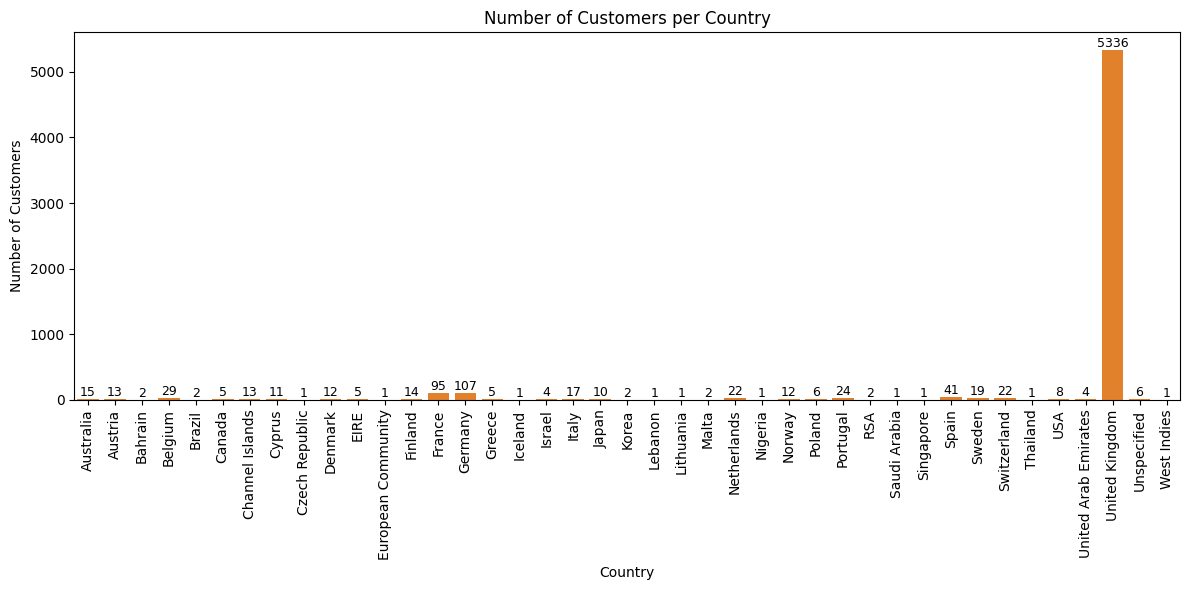

In [115]:
### **문제 3: 나라별 구매 인원 시각화**
# `Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요.

# 나라별 고객 수 계산
customer_by_country = retail.groupby('Country')['Customer ID'].nunique()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_by_country.index, y=customer_by_country.values)
ax = sns.barplot(x=customer_by_country.index, y=customer_by_country.values)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Country')
plt.xticks(rotation=90)
for i, v in enumerate(customer_by_country.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

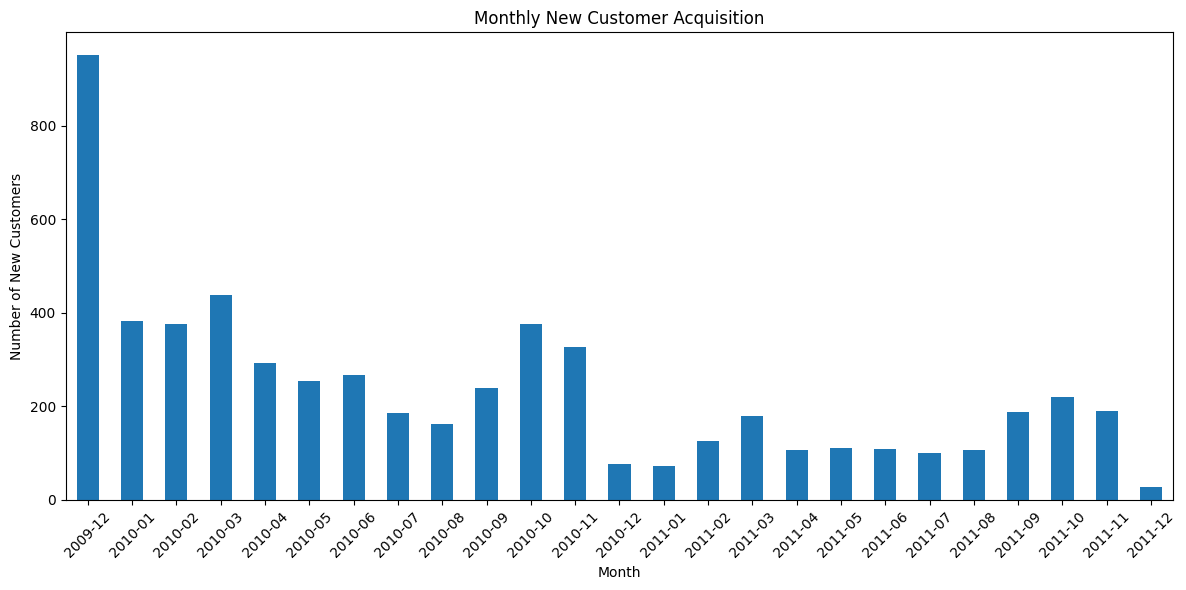

In [116]:
### **문제 4: Acquisition (고객 유입 분석)**
# 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
# 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

# 각 고객의 첫 구매 날짜찾기
first_purchase_dates = retail.groupby('Customer ID')['InvoiceDate'].min()

# 첫 구매 날짜를 데이터프레임으로 변환하기
first_purchase_df = pd.DataFrame({'Customer ID': first_purchase_dates.index, 'First Purchase Date': first_purchase_dates.values})

# 'First Purchase Date'를 월 단위로 변환
first_purchase_df['First Purchase Month'] = first_purchase_df['First Purchase Date'].dt.to_period('M')

# 월별 신규 고객 수 계산
monthly_new_customers = first_purchase_df.groupby('First Purchase Month')['Customer ID'].count()

# 신규 고객 수 시각화
plt.figure(figsize=(12, 6))
monthly_new_customers.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Monthly New Customer Acquisition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [177]:
### **문제 5: Activation (고객 활성화 분석)**
# 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
# 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.


# 활성화된 고객 정의 및 활성화율 계산
activation_rate >= 50  # 활성화 기준 금액 50pound 이상

# 각 고객의 총 구매 금액 계산
customer_total_purchase = retail.groupby('Customer ID')['Total'].sum()

# 활성화된 고객 수 계산
activated_customers = customer_total_purchase[customer_total_purchase >= activation_rate].count()

# 전체 고객 수
total_customers = len(customer_total_purchase)

# 활성화율 계산
activation_rate = (activated_customers / total_customers) * 100

# 결과 출력
print(f"전체 고객 수: {total_customers}")
print(f"활성화된 고객 수: {activated_customers}")
print(f"활성화율: {activation_rate:.2f}%")


전체 고객 수: 5862
활성화된 고객 수: 5651
활성화율: 96.40%


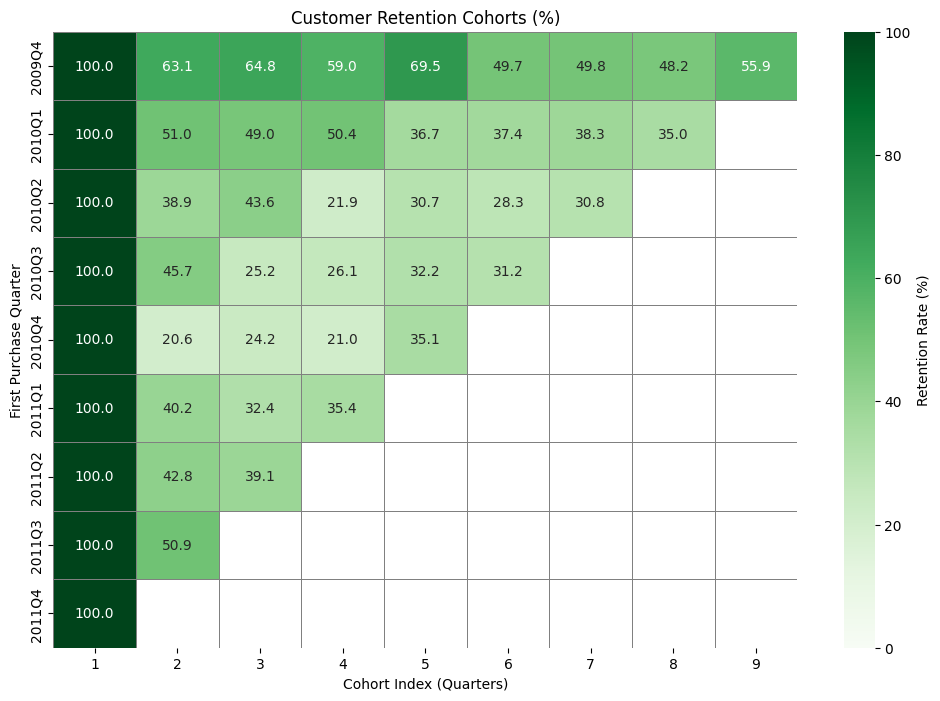

In [189]:
###문제 6: Retention:코호트 분석(ㅇ고객)
# 분기별 활성 사용자(Qarterly Active Users)를 분석하여 고객 유지 현황을 파악하세요
# 분기별 활성 고객 수를 계산하고, 이를 시각화하여 고객 유지 트렌드를 분석하세요.

# 'InvoiceDate'를 quarter로 변환하여 column 추가.
retail['Quarter'] = retail['InvoiceDate'].dt.to_period('Q')

# First Purchase Quarter. 최초 유입 quarter 계산
first_purchase_quarter = retail.groupby('Customer ID')['Quarter'].min()
retail['First Purchase Quarter'] = retail['Customer ID'].map(first_purchase_quarter)

# Cohort Index 추가 (분기 기준)
retail['CohortIndex'] = (retail['Quarter'].dt.quarter - retail['First Purchase Quarter'].dt.quarter) + \
 (retail['Quarter'].dt.year - retail['First Purchase Quarter'].dt.year) * 4 + 1

# Cohort Table 생성
cohort_table = retail.groupby(['First Purchase Quarter', 'CohortIndex'])['Customer ID'].nunique().unstack()

# Retention Matrix 계산
cohort_size = cohort_table.iloc[:, 0]
retention_matrix = cohort_table.divide(cohort_size, axis=0)

# 퍼센트 변환
retention_matrix_percent = retention_matrix * 100

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=retention_matrix_percent,
    annot=True,
    fmt='.1f',                 # 소수점 1자리까지 보여줌 (예: 85.7%)
    cmap='Greens',
    cbar_kws={'label': 'Retention Rate (%)'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=100            # 퍼센트니까 0~100
)
plt.title('Customer Retention Cohorts (%)')
plt.xlabel('Cohort Index (Quarters)')
plt.ylabel('First Purchase Quarter')
plt.show()

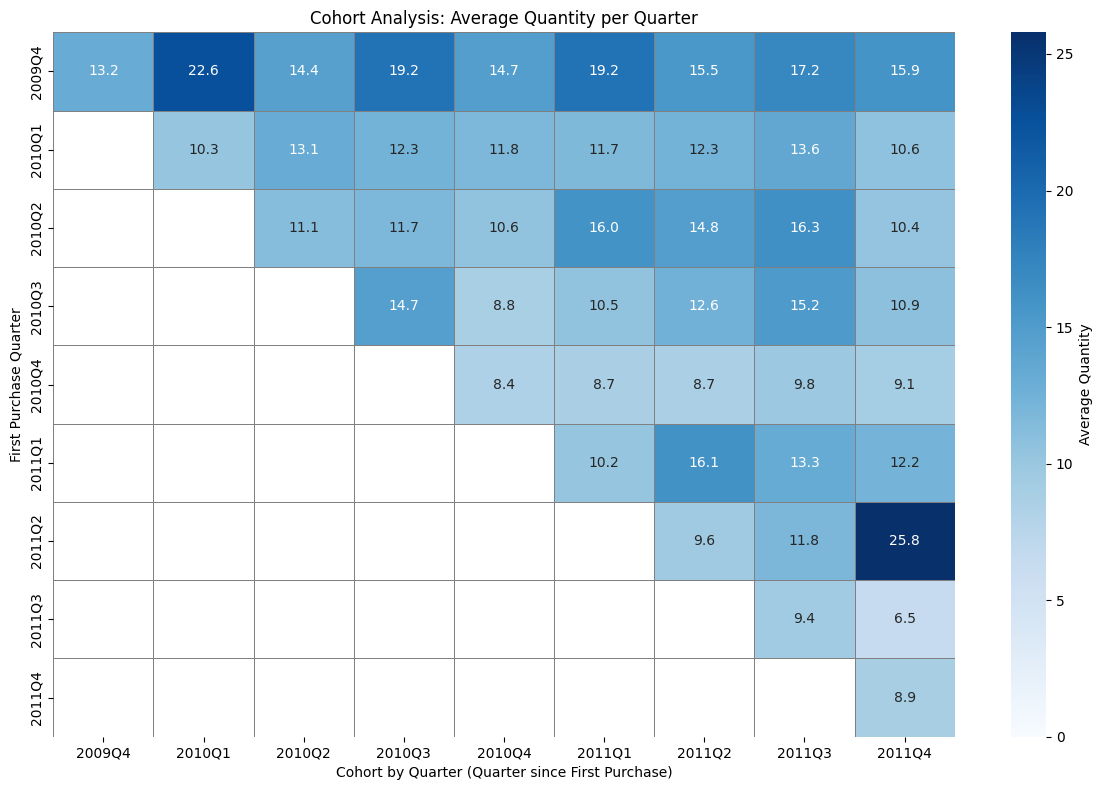

In [194]:
### **문제 7: Retention: 코호트 분석(평균 구매수량)**
# 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
# 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의
# Y축은 활성사용자의 첫 구매분기.   X축은 각 연도와 분기 표기.

# 1. 평균 구매 수량 계산
average_quantity = retail.groupby(['First Purchase Quarter', 'Quarter'])['Quantity'].mean().unstack()

# 2. Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    data=average_quantity,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
plt.title('Cohort Analysis: Average Quantity per Quarter')
plt.xlabel('Cohort by Quarter (Quarter since First Purchase)')
plt.ylabel('First Purchase Quarter')
plt.tight_layout()
plt.show()


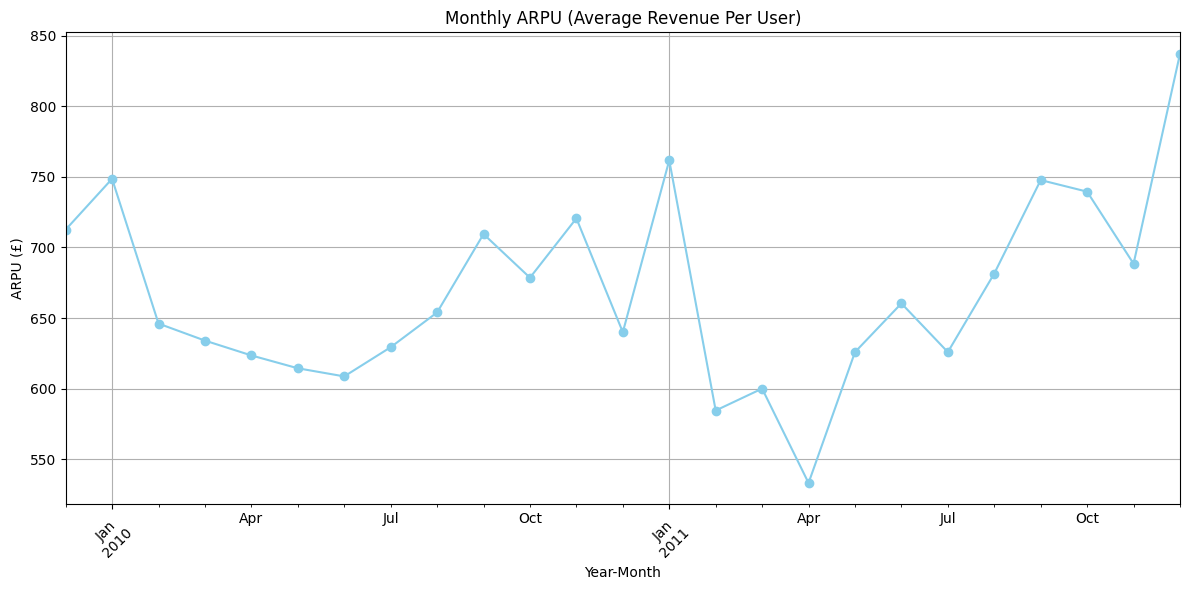

In [129]:
### 문제 8: Revenue : ARPU
# 각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU (Aveage Revenue Per User)를 분석하세요.

import matplotlib.pyplot as plt

# 1. 'InvoiceDate'를 월 단위로 변환
retail['Month'] = retail['InvoiceDate'].dt.to_period('M')

# 2. 총 구매 금액 컬럼 생성
retail['Total'] = retail['Quantity'] * retail['Price']

# 3. 고객별 월별 총 구매 금액 계산
monthly_revenue_by_customer = retail.groupby(['Month', 'Customer ID'])['Total'].sum().reset_index()

# 4. 월별 ARPU 계산 (평균 구매금액)
arpu = monthly_revenue_by_customer.groupby('Month')['Total'].mean()

# 5. 시각화
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [133]:
### **문제 9: Revenue(CLV)**
# 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
# CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)


# 1. 고객별 평균 구매 금액 (한 번 구매 시 평균 금액)
average_revenue = retail.groupby('Customer ID')['Total'].mean()

# 2. 고객별 구매 빈도 (총 구매 횟수)
purchase_frequency = retail.groupby('Customer ID')['Invoice'].count()

# 3. 고객별 유지 기간 (마지막 구매 - 첫 구매 + 1일)
customer_lifetime = retail.groupby('Customer ID')['InvoiceDate'].agg(['min', 'max'])
customer_lifetime['Customer_Lifetime'] = (customer_lifetime['max'] - customer_lifetime['min']).dt.days + 1

# 4. CLV 계산
clv_df = pd.DataFrame({
    'Average_Revenue': average_revenue,
    'Purchase_Frequency': purchase_frequency,
    'Customer_Lifetime': customer_lifetime['Customer_Lifetime']})

clv_df['CLV'] = clv_df['Average_Revenue'] * clv_df['Purchase_Frequency'] * clv_df['Customer_Lifetime']

# 5. CLV 기준으로 내림차순 정렬
clv_df = clv_df.sort_values(by='CLV', ascending=False)

# 6. 결과 출력
clv_df.head(10)  # 상위 10명 확인


,Average_Revenue,Purchase_Frequency,Customer_Lifetime,CLV
Customer ID,,,,
18102,558.641385,1040,739,4.293494e+08
14646,137.929175,3819,736,3.876891e+08
14156,75.690347,4033,729,2.225339e+08
14911,25.325690,11057,738,2.066593e+08
13694,128.795714,1519,732,1.432090e+08
17511,92.148217,1868,735,1.265177e+08
16684,204.934220,718,729,1.072671e+08
17450,582.819643,420,430,1.052572e+08
15061,140.900301,897,735,9.289486e+07


In [157]:
### 문제10
# 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다.
# 고객 100명이 대기한 시간을 시뮬레이션하고, (random으로 뽑아 돌리라는 direction)
# 평균 대기시간과 표준편차를 계산하세요.


# 고객 수
num_customers = 100

# 균등분포 범위: 5분 ~ 15분
min_wait = 5
max_wait = 15

# 대기시간 시뮬레이션
wait_times = np.random.uniform(min_wait, max_wait, num_customers)

# 평균과 표준편차 계산
mean_wait = np.mean(wait_times)
std_wait = np.std(wait_times)

# 결과 출력
print(f"평균 대기시간: {mean_wait:.2f}분")
print(f"표준편차: {std_wait:.2f}분")


평균 대기시간: 10.27분
표준편차: 2.88분


In [175]:
### 문제11
# 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다.
# 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.
# 성공 또는 실패 => 이항분포

# 성공 확률
p = 0.3

# 시행 횟수
n = 10

# 시뮬레이션: 성공 여부를 1(성공) 또는 0(실패)로 반환
results = np.random.binomial(1, p, n)

# 결과 출력
print("총 성공 횟수:", np.sum(results))
print("성공 여부 (1=성공, 0=실패):", results)

총 성공 횟수: 3
성공 여부 (1=성공, 0=실패): [1 0 1 1 0 0 0 0 0 0]


In [152]:
### 문제12
# 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다.
# 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.
# 이항분포  정답 1  틀린다 0

# 파라미터 설정
num_students = 20
num_questions = 5
prob_correct = 0.7

# 시뮬레이션 (학생별 정답 개수)
scores = np.random.binomial(n=num_questions, p=prob_correct, size=num_students)

# 출력
print("학생별 점수:", scores)
print("전체 평균 점수:", np.mean(scores))

학생별 점수: [5 3 3 5 5 4 2 5 3 2 5 5 4 5 4 4 4 4 3 4]
전체 평균 점수: 3.95


45g 이상 55g 이하 제품 비율 (within_range): 0.6900


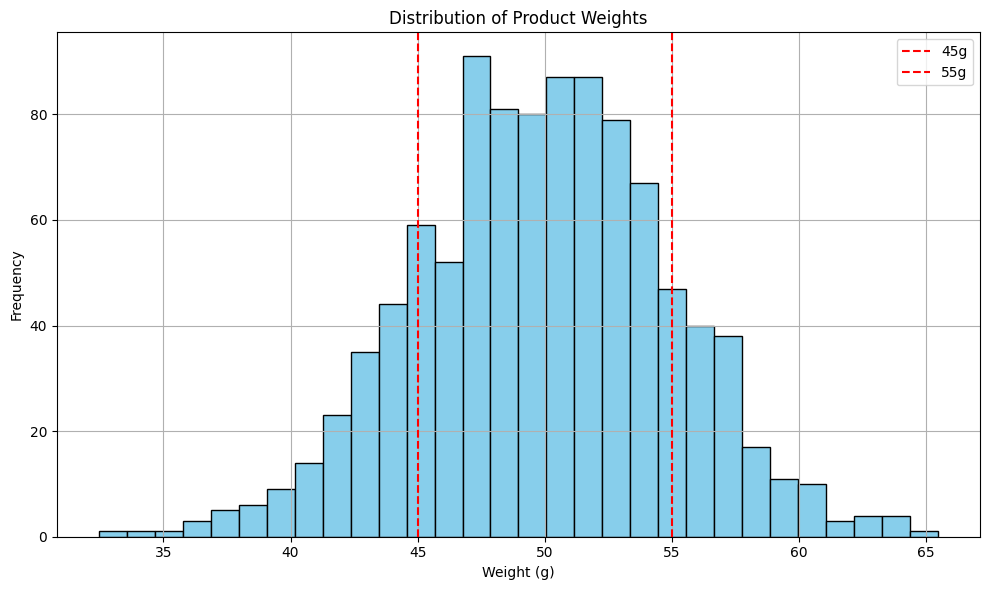

In [195]:
### 문제13
# 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.
# 1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요.
# 무게 분포의 히스토그램을 그리세요.

# 파라미터 설정
mean = 50
std = 5
n_samples = 1000

# 1. 제품 무게 시뮬레이션
weights = np.random.normal(loc=mean, scale=std, size=n_samples)

# 2. 45g 이상 55g 이하인 제품 비율 계산
within_range = np.mean((weights >= 45) & (weights <= 55))

# 3. 결과 출력
print(f"45g 이상 55g 이하 제품 비율 (within_range): {within_range:.4f}")

# 4. 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(weights, bins=30, color='skyblue', edgecolor='black')
plt.axvline(45, color='red', linestyle='--', label='45g')
plt.axvline(55, color='red', linestyle='--', label='55g')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Main Quest 3 회고

Colab에서 작성했는데, data source file을 goolge drive에 올리고 연동해야하는 걸 잊어버려서,  한참 시간이 걸림.   결국 chatGPT의 도움을 받음.

문제 2번 data cleaning에서 이상치 제거와 중복치 제거를 했는데, product description등에서 좀 더 cleaning을 했으면 좋았을 것 같다.

문제 3번~ 5번까지는 몇번 코드를 반복하다 minor한 error의 연속으로 시간이 걸려서,  결국 copilot에게  cleansing을 받았다.   자꾸 괄호랑 줄바꿈이랑 따옴표등이 틀린다.  

문제 6번~7번은  최초 유입 quarter와  활성화 정의를 식으로 만들기 어려웠고, cohort index를 만들기도 어려웠다.  cohort index로 quarter를 보는 것 보다,  quarter로  보는 게 본인에게는 더 이해가 쉬워서 7번은  y축과 x축을 모두  quarter (index 아닌) 로 만들었다.

문제 8번에서는 ARPU 의  A가 average라는 걸 잊어버리고, sum을 해서 예시답안과 자꾸 다른 답이 나왔는데,  average가  평균이라는 걸 생각해내고 허탈했음.

문제 9번에서 고객중 최장 활동일 수가 739일, 즉 데이터의 시작일 2009-12-1과 2011-12-9의  날짜 차이 만큼임.   우연히  이렇게 잡힐 수도 있을 거 같아서, 앞으로 돌아가 날짜 cleansing 다시 안하고 그냥 남겨둠.

문제 10번 ~ 13번은  random 함수를 써서 균등분포, 이항분포,  정규분포를 공부하는 내용이었는데,  random 함수를 써야하는 걸 잊어버려,  Day1 과 Day2의 실습답안지 보고 이해하게 됨.   문제 12의 경우 이항분포임을 이해하는 데 시간이 걸림.


일단 답안 작성은 마쳤으나,  코드가 계속 헷갈린다.  개념 정립이라도 좀 clear하게 하기 위해 강사님의 실습 정답지를 몇번 더 읽어봐야겠다.   강의비디오를 다시 볼 때는 내가 원하는 내용의 위치를 찾는데 시간이 걸려서  실습 정답지와 교안이 좀 더 도움이 된다.